In [37]:
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
from sklearn.metrics import normalized_mutual_info_score

from py_graphs.cluster import KernelKMeans
from py_graphs.graphs import dataset
from py_graphs.graphs import sample
from py_graphs.measure.distance import *
from py_graphs.measure.kernel import *
from py_graphs.measure.shortcuts import *
from py_graphs.scorer import rand_index

In [4]:
from tqdm import tqdm
import time
for i in tqdm(range(2)):
    time.sleep(1)
    if i > 0:
        raise Exception()

 50%|█████     | 1/2 [00:01<00:01,  1.00s/it]


Exception: 

In [3]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [84]:
A

array([[ 0.       ,  0.       ,  0.11475  , ...,  0.053948 ,  0.00907  ,
         0.       ],
       [ 0.       ,  0.       ,  0.070336 , ...,  0.       ,  0.       ,
         0.       ],
       [ 0.11475  ,  0.070336 ,  0.       , ...,  0.05499  ,  0.027551 ,
         0.037086 ],
       ..., 
       [ 0.053948 ,  0.       ,  0.05499  , ...,  0.       ,  0.       ,
         0.0011817],
       [ 0.00907  ,  0.       ,  0.027551 , ...,  0.       ,  0.       ,
         0.049195 ],
       [ 0.       ,  0.       ,  0.037086 , ...,  0.0011817,  0.049195 ,
         0.       ]])

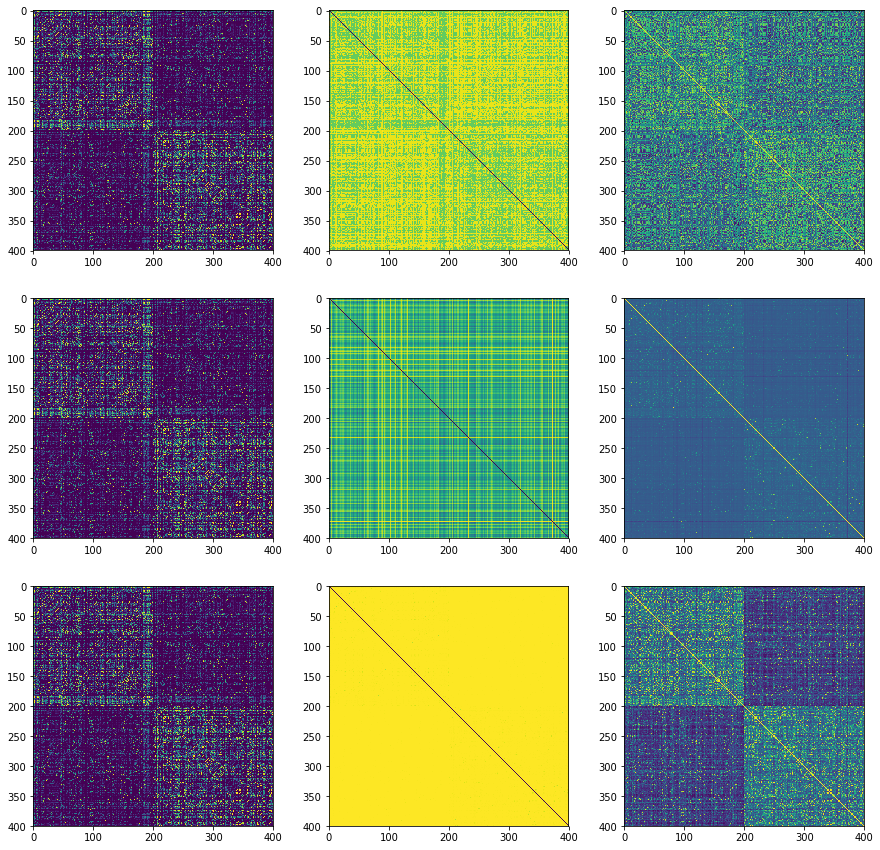

In [82]:
graphs, info = dataset.news_2cl_1
A, y_true = graphs[0]

fig, ax = plt.subplots(3, 3, figsize=(15, 15))

ax[0][0].imshow(sigmoid(normalize(A)))
ax[0][1].imshow(sigmoid(normalize(D_SP(A > 0))))
ax[0][2].imshow(sigmoid(normalize(D_to_K(D_SP(A > 0)))))

ax[1][0].imshow(sigmoid(normalize(A)))
ax[1][1].imshow(sigmoid(normalize(H_to_D(H_R(A)))))
ax[1][2].imshow(sigmoid(normalize(H_R(A))))

ax[2][0].imshow(sigmoid(normalize(A)))
ax[2][1].imshow(sigmoid(normalize(FE(A).get_D(0.01))))
ax[2][2].imshow(sigmoid(normalize(FE_K(A).get_K(0.01))))

In [83]:
def test_quality(K):
    kmeans = KernelKMeans(n_clusters=info['k'])
    y_test = kmeans.fit_predict(K)
    return rand_index(y_true, y_test)

# without normalization
K = D_to_K(D_SP(A))
quality1 = test_quality(K)
print('without normalization', '\t', quality1)

# normalization of distance
K = D_to_K(normalize(D_SP(A)))
quality2 = test_quality(K)
print('normalization of distance', '\t', quality2)

# normalization of kernel
K = D_to_K(normalize(D_SP(A)))
quality3 = test_quality(K)
print('normalization of kernel', '\t', quality3)

# both
K = normalize(D_to_K(normalize(D_SP(A))))
quality4 = test_quality(K)
print('both', '\t', quality4)

# distance
K = D_SP(A)
quality5 = test_quality(K)
print('distance', '\t', quality5)

# another measure (FE)
K = D_to_K(FE(A).get_D(0.01))
quality6 = test_quality(K)
print('another measure (FE)', '\t', quality6)

# another measure (CT)
K = H_R(A)
quality7 = test_quality(K)
print('another measure (CT)', '\t', quality7)


without normalization 	 0.5092857142857142
normalization of distance 	 0.498796992481203
normalization of kernel 	 0.49906015037593987
both 	 0.4993609022556391
distance 	 0.498859649122807
another measure (FE) 	 0.9463784461152882
another measure (CT) 	 0.498796992481203
